In [38]:
# Import all required libraries for this analysis
import pandas as pd
import pandas_datareader as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns

In [2]:
# Define start and end dates for the data pull
start = datetime.datetime(2013,1,1)
end = datetime.date.today()

In [3]:
# Get datasets for each individual stock from yahoo API
google_data = web.DataReader("GOOGL", "yahoo", start, end)
apple_data = web.DataReader("AAPL", "yahoo", start, end)
exxon_data = web.DataReader("XOM", "yahoo", start, end)
aksteel_data = web.DataReader("AKS", "yahoo", start, end)
sp500_data = web.DataReader('^GSPC','yahoo', start, end)

In [4]:
# Join the adjusted close prices all into one dataframe
stocks = pd.DataFrame({"AAPL": apple_data["Adj Close"],
                      "XOM": exxon_data["Adj Close"],
                      "GOOGL": google_data["Adj Close"],
                      "AKS": aksteel_data["Adj Close"],
                      "SP500" : sp500_data["Adj Close"]})

In [5]:
stocks.head()

,AAPL,AKS,GOOGL,SP500,XOM
Date,,,,,
2013-01-02,70.934219,4.75,361.987000,1462.420044,75.541420
2013-01-03,70.038872,4.62,362.197205,1459.369995,75.405167
2013-01-04,68.087959,4.81,369.354340,1466.469971,75.754295
2013-01-07,67.687439,4.90,367.742737,1461.890015,74.877205
2013-01-08,67.869614,4.69,367.017029,1457.150024,75.345551


In [6]:
# Moving average for Google
google_data["20d"] = google_data["Adj Close"].rolling(window=20, min_periods=1).mean()
google_data["60d"] = google_data["Adj Close"].rolling(window=60, min_periods=1).mean()
google_data["100d"] = google_data["Adj Close"].rolling(window=100, min_periods=1).mean()

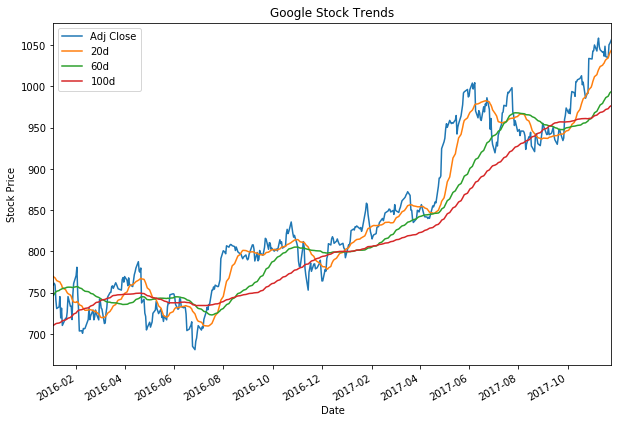

In [7]:
# Plot the moving averages - look for  trading signals
google_data[["Adj Close", "20d","60d","100d"]].loc['1/1/2016':'11/26/2017'].plot(figsize=(10,7))
plt.title("Google Stock Trends")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [8]:
# Calculating the returns for all stocks
# Each value shows % of original value
returns = stocks.apply(lambda x: x / x[0])
returns.head()

,AAPL,AKS,GOOGL,SP500,XOM
Date,,,,,
2013-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2013-01-03,0.987378,0.972632,1.000581,0.997914,0.998196
2013-01-04,0.959875,1.012632,1.020352,1.002769,1.002818
2013-01-07,0.954228,1.031579,1.015900,0.999638,0.991207
2013-01-08,0.956797,0.987368,1.013896,0.996396,0.997407


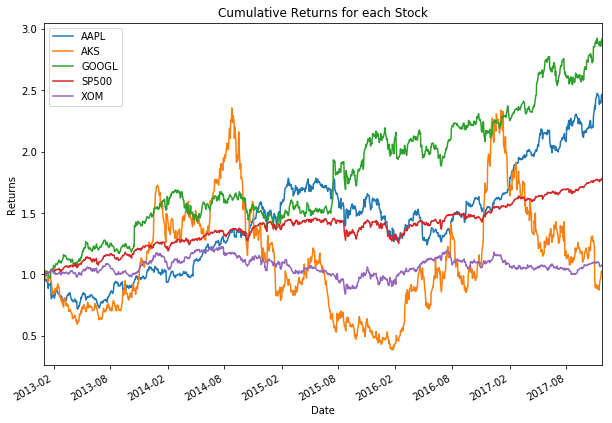

In [46]:
returns.plot(figsize=(10,7))
plt.title("Cumulative Returns for each Stock")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.show()

In [44]:
# Calculate the alpha for each stock and plot
alpha = returns[["AAPL","AKS","GOOGL","XOM"]].subtract(returns["SP500"],axis=0)
alpha.head()

,AAPL,AKS,GOOGL,XOM
Date,,,,
2013-01-02,0.000000,0.000000,0.000000,0.000000
2013-01-03,-0.010537,-0.025283,0.002666,0.000282
2013-01-04,-0.042895,0.009862,0.017583,0.000049
2013-01-07,-0.045409,0.031941,0.016263,-0.008430
2013-01-08,-0.039600,-0.009028,0.017499,0.001011


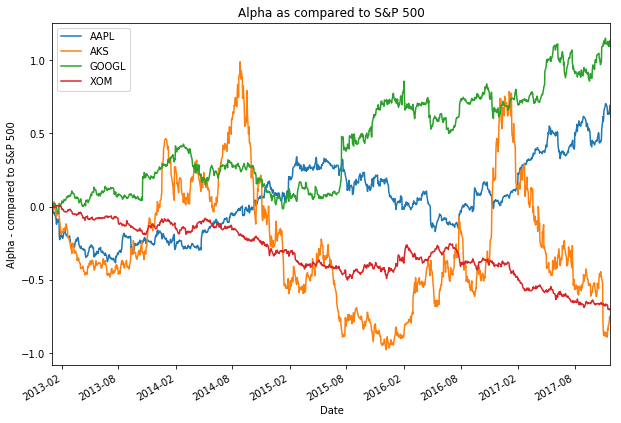

In [45]:
# Plot the cumulative alpha over time
alpha.plot(figsize=(10,7))
plt.title("Alpha as compared to S&P 500")
plt.xlabel("Date")
plt.ylabel("Alpha - compared to S&P 500")
plt.show()

In [20]:
# Calculate the betas - as a cumulative, not rolling
covariances = returns.expanding(min_periods=1).cov(returns["SP500"])
variances = returns.expanding(min_periods=1).var()
beta = covariances.div(variances["SP500"],axis=0)
beta.head()

,AAPL,AKS,GOOGL,SP500,XOM
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,6.052028,13.122454,-0.278430,1.0,0.864821
2013-01-04,-6.134432,8.043349,4.246833,1.0,0.955442
2013-01-07,-4.972803,6.537402,3.829452,1.0,1.268277
2013-01-08,-0.241647,5.608777,1.419233,1.0,0.752242


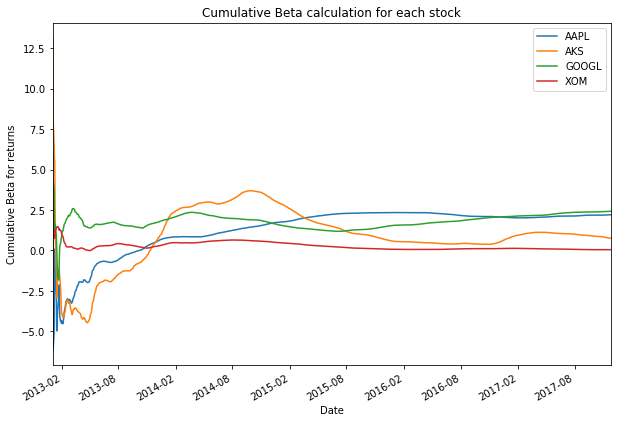

In [21]:
# Plot the betas
beta[["AAPL","AKS","GOOGL","XOM"]].plot(figsize=(10,7))
plt.title("Cumulative Beta calculation for each stock")
plt.ylabel("Cumulative Beta for returns")
plt.show()

In [40]:
# Create Correlation matrix based on daily returns

daily_returns = stocks.pct_change()
returns_corr = daily_returns.corr()
returns_corr

,AAPL,AKS,GOOGL,SP500,XOM
AAPL,1.000000,0.127190,0.315410,0.485819,0.228731
AKS,0.127190,1.000000,0.158597,0.388618,0.358946
GOOGL,0.315410,0.158597,1.000000,0.582621,0.265790
SP500,0.485819,0.388618,0.582621,1.000000,0.642810
XOM,0.228731,0.358946,0.265790,0.642810,1.000000


In [43]:
# Output Stock data
# file_path = "C:/Users/sasth/Documents/BDAA/Investment Workshop 11.27.17/Investment Workshop - Solution Workbook.xlsx"
# stocks.to_excel(file_path, sheet_name = "Stock Data", index=True,)